In [1]:
#importing Dependancies
#============================================================================================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
#loading data for visualizations
#============================================================================================

file_path_1 = Path('cleaned_data/passing_data.csv')
file_path_2 = Path('cleaned_data/rushing_data.csv')
file_path_3 = Path('cleaned_data/receiving_data.csv')


passing_df = pd.read_csv(file_path_1)
rushing_df = pd.read_csv(file_path_2)
receiving_df = pd.read_csv(file_path_3)

In [3]:
#display passing data
#============================================================================================
passing_df.head()

,Unnamed: 0,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost
0,0,A.J. Brown,0,2,0,0,0,0,0,0,79.2,0
1,1,A.J. McCarron,22,38,245,0,1,5,43,41,223.5,0
2,2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10
3,3,Albert Wilson,1,3,20,0,0,0,0,20,125.0,0
4,4,Alex Erickson,1,2,26,0,0,0,0,26,158.3,0


In [4]:
#dropping unnecessary column 
#==================================
passing_df=passing_df.drop(['Unnamed: 0'],axis=1)


In [5]:
#Adding touchdown/interception ratio
#==================================
passing_df['Td_int_ratio'] = passing_df['pass_td']/passing_df['pass_int']
passing_df.head()

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
0,A.J. Brown,0,2,0,0,0,0,0,0,79.2,0,NaN
1,A.J. McCarron,22,38,245,0,1,5,43,41,223.5,0,0.00
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.65
3,Albert Wilson,1,3,20,0,0,0,0,20,125.0,0,NaN
4,Alex Erickson,1,2,26,0,0,0,0,26,158.3,0,NaN


In [6]:
#defining qualified players as players with a minimum of 125 pass attempts
qualified_players = passing_df.loc[passing_df['pass_att']>125]
qualified_players

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000
5,Alex Smith,168,252,1582,6,8,22,139,231,588.3,0,0.750000
10,Andy Dalton,784,1258,8354,47,35,83,598,1284,3101.2,7,1.342857
13,Baker Mayfield,1003,1662,11829,73,47,125,823,2007,4505.4,10,1.553191
15,Ben Roethlisberger,900,1387,8610,61,25,55,378,1229,3161.7,6,2.440000
...,...,...,...,...,...,...,...,...,...,...,...,...
196,Trevor Siemian,112,195,1162,11,3,11,81,180,682.7,1,3.666667
198,Tua Tagovailoa,579,864,6145,39,18,48,347,962,2652.5,2,2.166667
202,Tyler Huntley,131,206,1156,3,4,19,115,226,649.9,3,0.750000
203,Tyrod Taylor,112,189,1218,6,6,15,120,260,766.6,0,1.000000


In [7]:
#Filtering for top 10 players in passing yards 
#=============================================
top_yards = passing_df.nlargest(n=10, columns=['pass_yds'])
top_yards

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
164,Patrick Mahomes,1532,2302,18291,144,34,94,617,2642,6450.3,8,4.235294
190,Tom Brady,1643,2548,18143,129,38,96,657,2466,6179.4,8,3.394737
111,Josh Allen,1398,2171,15956,126,41,114,749,2318,6025.8,16,3.073171
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000
148,Matt Ryan,1393,2099,15023,81,46,153,1031,1992,4942.7,15,1.760870
63,Derek Carr,1295,1922,14691,80,36,111,686,2182,5404.3,16,2.222222
150,Matthew Stafford,1210,1818,14420,102,43,117,848,2243,5232.6,9,2.372093
130,Kirk Cousins,1243,1845,14237,107,32,117,825,2268,5795.6,11,3.343750
97,Jared Goff,1285,1967,14068,75,43,99,754,1979,4896.2,18,1.744186
172,Russell Wilson,1148,1759,13658,104,29,160,1072,2315,5606.9,7,3.586207


In [8]:
#Filtering for top 10 players in touchdown/interception ratio 
#=============================================
best_ratio = qualified_players.nlargest(n=10, columns=['Td_int_ratio'])
best_ratio

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000
78,Geno Smith,250,349,2659,18,4,33,273,478,1357.5,2,4.500000
164,Patrick Mahomes,1532,2302,18291,144,34,94,617,2642,6450.3,8,4.235294
67,Drew Brees,629,874,6528,55,14,28,209,949,2712.9,3,3.928571
196,Trevor Siemian,112,195,1162,11,3,11,81,180,682.7,1,3.666667
172,Russell Wilson,1148,1759,13658,104,29,160,1072,2315,5606.9,7,3.586207
76,Gardner Minshew II,543,859,5992,41,12,65,362,998,2556.3,11,3.416667
190,Tom Brady,1643,2548,18143,129,38,96,657,2466,6179.4,8,3.394737
130,Kirk Cousins,1243,1845,14237,107,32,117,825,2268,5795.6,11,3.343750
65,Deshaun Watson,766,1116,9310,62,19,104,604,1361,3481.1,6,3.263158


In [9]:
#Filtering for top 10 players in passing touchdowns 
#=============================================
touchdown_leaders = passing_df.nlargest(n=10, columns=['pass_td'])
touchdown_leaders

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
164,Patrick Mahomes,1532,2302,18291,144,34,94,617,2642,6450.3,8,4.235294
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000
190,Tom Brady,1643,2548,18143,129,38,96,657,2466,6179.4,8,3.394737
111,Josh Allen,1398,2171,15956,126,41,114,749,2318,6025.8,16,3.073171
130,Kirk Cousins,1243,1845,14237,107,32,117,825,2268,5795.6,11,3.343750
172,Russell Wilson,1148,1759,13658,104,29,160,1072,2315,5606.9,7,3.586207
150,Matthew Stafford,1210,1818,14420,102,43,117,848,2243,5232.6,9,2.372093
133,Lamar Jackson,963,1501,11107,94,38,119,599,1937,5093.1,11,2.473684
176,Ryan Tannehill,1037,1554,12146,89,35,123,876,2236,5535.4,9,2.542857
119,Justin Herbert,1042,1575,11359,81,29,73,485,1639,3855.7,4,2.793103


In [10]:
#Filtering for 10 players with most interceptions

#=============================================
interception_leaders = passing_df.nlargest(n=10, columns=['pass_int'])
interception_leaders

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio
13,Baker Mayfield,1003,1662,11829,73,47,125,823,2007,4505.4,10,1.553191
148,Matt Ryan,1393,2099,15023,81,46,153,1031,1992,4942.7,15,1.760870
97,Jared Goff,1285,1967,14068,75,43,99,754,1979,4896.2,18,1.744186
150,Matthew Stafford,1210,1818,14420,102,43,117,848,2243,5232.6,9,2.372093
132,Kyler Murray,1291,1940,13610,80,42,127,937,2137,5131.7,7,1.904762
111,Josh Allen,1398,2171,15956,126,41,114,749,2318,6025.8,16,3.073171
93,Jameis Winston,556,914,7268,52,38,71,436,1210,2672.9,6,1.368421
102,Jimmy Garoppolo,924,1368,11318,68,38,98,636,1945,4767.0,10,1.789474
133,Lamar Jackson,963,1501,11107,94,38,119,599,1937,5093.1,11,2.473684
190,Tom Brady,1643,2548,18143,129,38,96,657,2466,6179.4,8,3.394737


In [11]:
#Creating Completion percentage column to create additional visualizations
#=========================================================================
passing_df['cmp_pct'] = passing_df['pass_cmp']/ passing_df['pass_att']
passing_df.head()


,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio,cmp_pct
0,A.J. Brown,0,2,0,0,0,0,0,0,79.2,0,NaN,0.000000
1,A.J. McCarron,22,38,245,0,1,5,43,41,223.5,0,0.00,0.578947
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.65,0.671477
3,Albert Wilson,1,3,20,0,0,0,0,20,125.0,0,NaN,0.333333
4,Alex Erickson,1,2,26,0,0,0,0,26,158.3,0,NaN,0.500000


In [12]:
#creating new dataframe with completion percentage showing for passers with more than 125 attempts 
cmp_pct_df = passing_df.loc[(passing_df['pass_att']>125)]
cmp_pct_df.head()

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio,cmp_pct
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000,0.671477
5,Alex Smith,168,252,1582,6,8,22,139,231,588.3,0,0.750000,0.666667
10,Andy Dalton,784,1258,8354,47,35,83,598,1284,3101.2,7,1.342857,0.623211
13,Baker Mayfield,1003,1662,11829,73,47,125,823,2007,4505.4,10,1.553191,0.603490
15,Ben Roethlisberger,900,1387,8610,61,25,55,378,1229,3161.7,6,2.440000,0.648882


In [13]:
#reformatting percentage column for graphing purposes
#====================================================================
cmp_pct_df['cmp_pct'] = cmp_pct_df['cmp_pct'] *100
cmp_pct_df.head()

C:\Users\palum\AppData\Local\Temp\ipykernel_18780\2296287558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmp_pct_df['cmp_pct'] = cmp_pct_df['cmp_pct'] *100


,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio,cmp_pct
2,Aaron Rodgers,1396,2079,15652,133,20,118,887,2608,6524.6,10,6.650000,67.147667
5,Alex Smith,168,252,1582,6,8,22,139,231,588.3,0,0.750000,66.666667
10,Andy Dalton,784,1258,8354,47,35,83,598,1284,3101.2,7,1.342857,62.321145
13,Baker Mayfield,1003,1662,11829,73,47,125,823,2007,4505.4,10,1.553191,60.348977
15,Ben Roethlisberger,900,1387,8610,61,25,55,378,1229,3161.7,6,2.440000,64.888248


In [14]:
#Filtering for top 10 players in completion percentage *** dataframe used filters for 
#=============================================
top_completions = cmp_pct_df.nlargest(n=10, columns=['cmp_pct'])
top_completions.head()

,player,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_sacked,pass_sacked_yds,pass_long,pass_rating,fumbles_lost,Td_int_ratio,cmp_pct
67,Drew Brees,629,874,6528,55,14,28,209,949,2712.9,3,3.928571,71.967963
78,Geno Smith,250,349,2659,18,4,33,273,478,1357.5,2,4.500000,71.633238
45,Colt McCoy,132,192,1237,4,3,17,108,223,724.2,2,1.333333,68.750000
65,Deshaun Watson,766,1116,9310,62,19,104,604,1361,3481.1,6,3.263158,68.637993
103,Joe Burrow,938,1371,10733,69,27,131,934,1654,3819.0,8,2.555556,68.417214


# Passing Yard Leaders


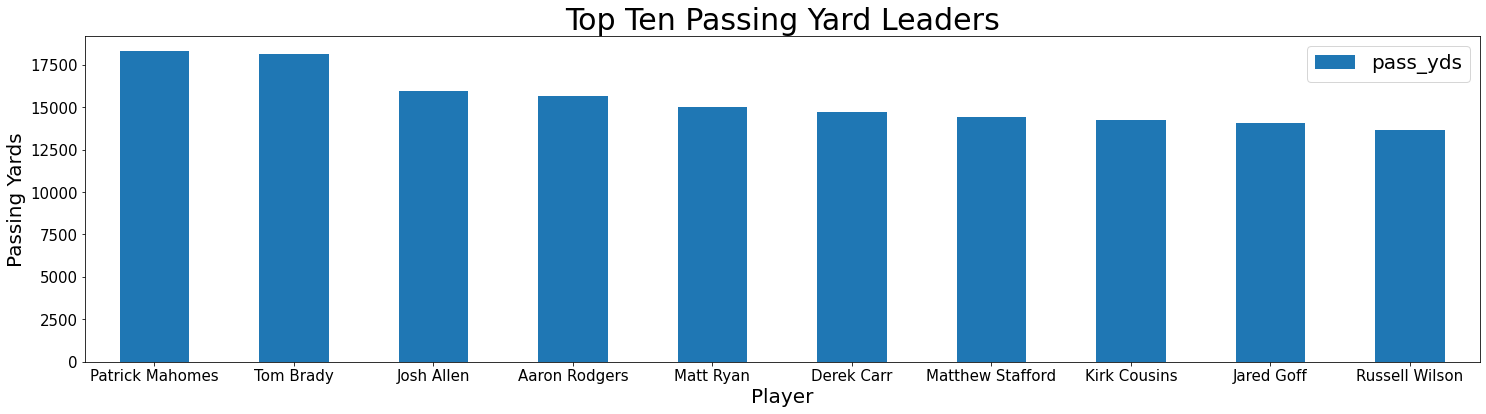

In [15]:
# plotting a bar graph for passing yard leaders

#==================================================================================================================
top_yards.plot(x="player",
               y="pass_yds", 
               kind="bar",
               figsize= (25,6),
              title = "Top Ten Passing Yard Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=360)
plt.title("Top Ten Passing Yard Leaders",fontsize = 30)
plt.xlabel('Player', fontsize=20)
plt.ylabel('Passing Yards', fontsize=20)
plt.savefig('Images/passing_yard_leaders.pdf',dpi = 500,bbox_inches='tight')
plt.legend(prop={'size': 20})
plt.show()


# Touchdown/Interception Ratio Leaders

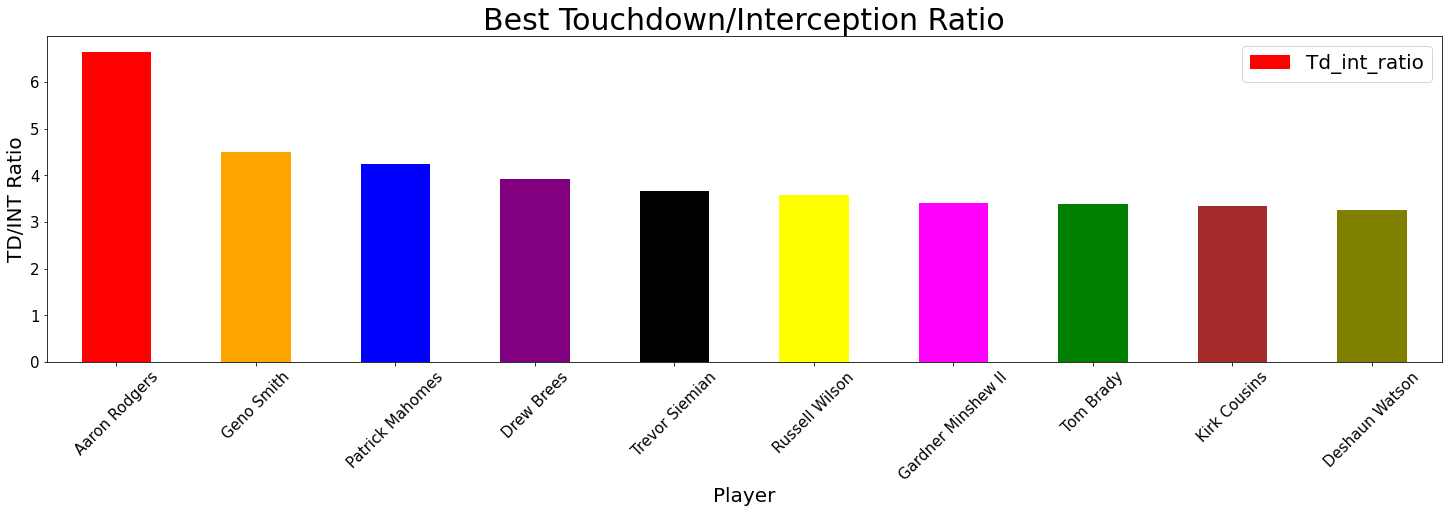

In [16]:
# plotting a bar graph for TD/Int ratio leaders
#==================================================================================

c = ['red','orange','blue','purple','black','yellow','magenta','green','brown','olive']
best_ratio.plot(x="player",
               y="Td_int_ratio", 
               kind="bar",
                color = c,
               figsize= (25,6),
              title = "Best Touchdown/Interception Ratio",
              legend = True,
              fontsize = 15)


plt.title("Best Touchdown/Interception Ratio",fontsize = 30)
plt.savefig('Images/TD_INT_Leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('TD/INT Ratio', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

# Leaders in Completion Percentage


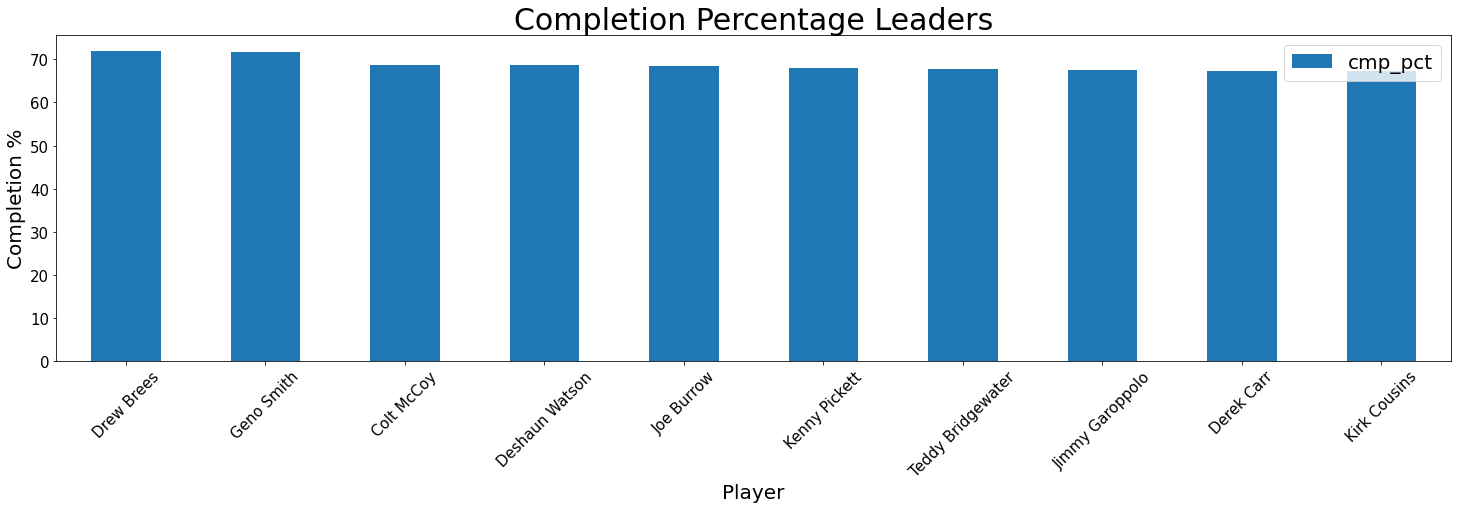

In [17]:
top_completions.plot(x="player",
               y="cmp_pct", 
               kind="bar",
               figsize= (25,6),
              title = "Completion Percentage Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Completion Percentage Leaders",fontsize = 30)
plt.savefig('Images/completion_percentage_leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Completion %', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

# Passing Touchdown Leaders 

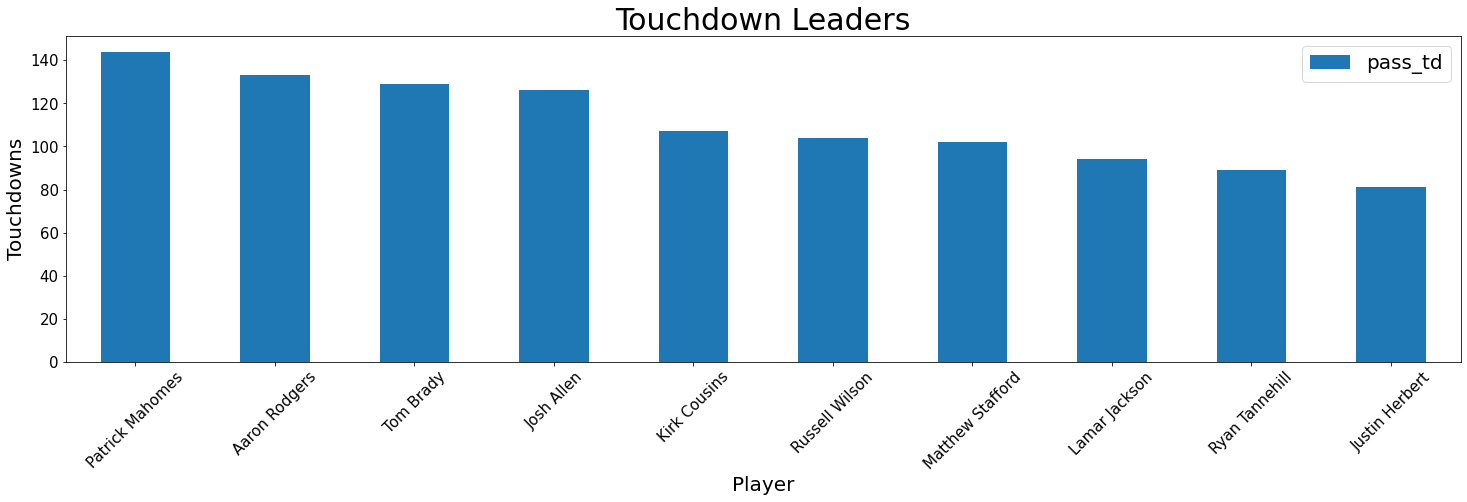

In [18]:
touchdown_leaders.plot(x="player",
               y="pass_td", 
               kind="bar",
               figsize= (25,6),
              title = "Touchdown Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Touchdown Leaders",fontsize = 30)
plt.savefig('Images/touchdown_leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Touchdowns', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()

# Interception Leaders


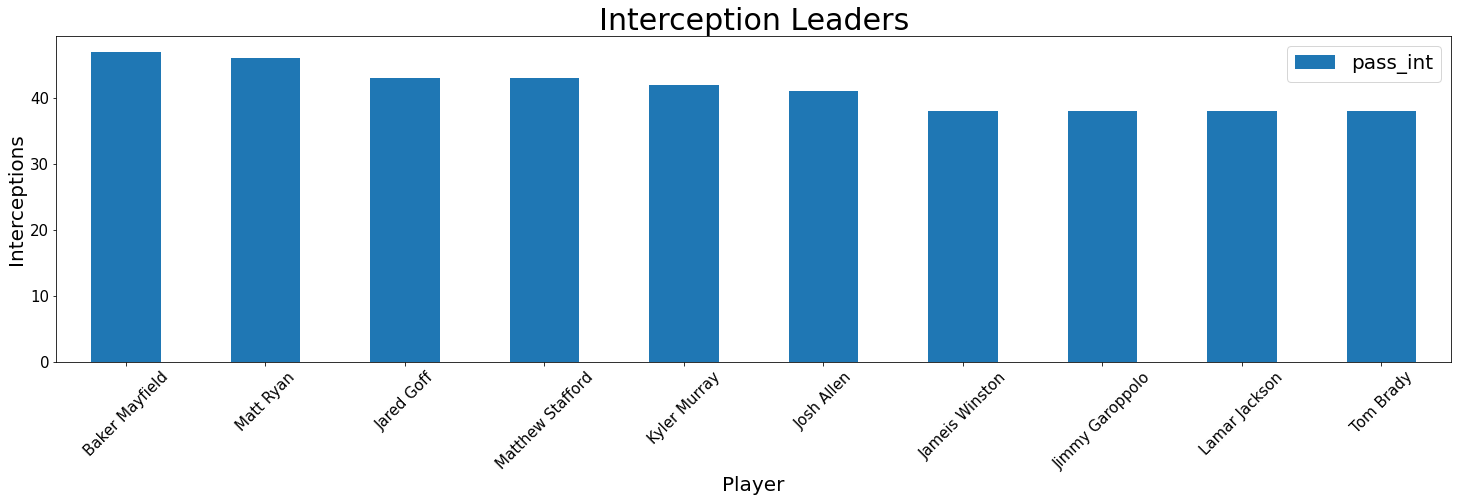

In [19]:
interception_leaders.plot(x="player",
               y="pass_int", 
               kind="bar",
               figsize= (25,6),
              title = "Interception Leaders",
              legend = True,
              fontsize = 15)

plt.xticks(rotation=45)
plt.title("Interception Leaders",fontsize = 30)
plt.savefig('Images/interception_leaders.pdf',dpi = 500,bbox_inches='tight')
plt.xlabel('Player', fontsize=20)
plt.ylabel('Interceptions', fontsize=20)
plt.legend(prop={'size': 20})
plt.show()